In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import *
import cv2
import numpy as np
import random
import os
import pandas as pd
import warnings

C:\Users\NITK\anaconda3\envs\Shyam_Lal\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [ ]:
import tensorflow as tf

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    directory=r"D:\Akshaya\Resampled prostate images with reduced images - Copy\train",
    target_size=(224, 224),
    batch_size=16,
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    directory=r"D:\Akshaya\Resampled prostate images with reduced images - Copy\Valid",
    target_size=(224, 224),
    batch_size=16,
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    directory=r"D:\Akshaya\Resampled prostate images with reduced images - Copy\test",
    target_size=(224, 224),
    batch_size=16,
    shuffle=False  
)

print("Train classes:", train_generator.class_indices)
print("Validation classes:", val_generator.class_indices)
print("Test classes:", test_generator.class_indices)


Found 11684 images belonging to 4 classes.
Found 2939 images belonging to 4 classes.
Found 2854 images belonging to 4 classes.
Train classes: {'0': 0, '1': 1, '2': 2, '3': 3}
Validation classes: {'0': 0, '1': 1, '2': 2, '3': 3}
Test classes: {'0': 0, '1': 1, '2': 2, '3': 3}


In [13]:
test_generator = img_generator.flow_from_directory(directory=r"D:\SujanD datasets\Cancer cells\test",target_size=(224, 224), batch_size=16, shuffle=True, subset="validation")

print(test_generator.class_indices)
print(test_generator.labels)

Found 385 images belonging to 4 classes.
{'A': 0, 'B': 1, 'C': 2, 'D': 3}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [6]:
def VGG16():

  input = tf.keras.layers.Input(shape=(224, 224, 3))

  conv1 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(input)
  conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
  pool1 = tf.keras.layers.MaxPooling2D((2, 2), (2,2))(conv2)
  conv3 = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
  conv4 = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
  pool2 = tf.keras.layers.MaxPooling2D((2, 2), (2,2))(conv4)
  conv5 = tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
  conv6 = tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
  conv7 = tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv6)
  pool3 = tf.keras.layers.MaxPooling2D((2, 2), (2,2))(conv7)
  conv8 = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
  conv9 = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv8)
  conv10 = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
  pool4 = tf.keras.layers.MaxPooling2D((2, 2), (2,2))(conv10)
  conv11 = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
  conv12 = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv11)
  conv13 = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv12)
  pool5 = tf.keras.layers.MaxPooling2D((2, 2), (2,2))(conv13)
  global_pool = tf.keras.layers.GlobalAveragePooling2D()( pool5)
  dense1 = tf.keras.layers.Dense(2048, activation='relu')(global_pool)
  dense2 = tf.keras.layers.Dense(2048, activation='relu')(dense1)
  output = tf.keras.layers.Dense(4, activation='softmax')(dense2)

  model = tf.keras.models.Model(inputs=input, outputs=output)
  return model
vgg16model= VGG16()
# vgg16model.compile(optimizer ='Adam' , loss = 'categorical_crossentropy' , metrics = ["acc"])
vgg16model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.0001)
vgg16model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    mode='min',
    factor=0.5,
    patience=5,
    verbose=1,
    cooldown=1,
    min_delta=0.0001
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

check_path = '/content/drive/MyDrive/VGG Pros.weights.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    check_path,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

hist_scratch = vgg16model.fit(
    train_generator,
    validation_data=val_generator,  
    epochs=30,
    verbose=1,
    callbacks=[reduce_lr, early_stop, checkpoint]
)


Epoch 1/30
731/731 [==============================] - 172s 219ms/step - loss: 1.0883 - accuracy: 0.4676 - val_loss: 1.7021 - val_accuracy: 0.4559

Epoch 00001: val_loss improved from inf to 1.70215, saving model to /content/drive/MyDrive\VGG Pros.weights.h5
Epoch 2/30
731/731 [==============================] - 122s 167ms/step - loss: 0.8683 - accuracy: 0.5923 - val_loss: 0.9724 - val_accuracy: 0.6193

Epoch 00002: val_loss improved from 1.70215 to 0.97239, saving model to /content/drive/MyDrive\VGG Pros.weights.h5
Epoch 3/30
731/731 [==============================] - 119s 163ms/step - loss: 0.7221 - accuracy: 0.6624 - val_loss: 0.7300 - val_accuracy: 0.6829

Epoch 00003: val_loss improved from 0.97239 to 0.72995, saving model to /content/drive/MyDrive\VGG Pros.weights.h5
Epoch 4/30
731/731 [==============================] - 119s 163ms/step - loss: 0.6260 - accuracy: 0.7114 - val_loss: 0.5747 - val_accuracy: 0.7414

Epoch 00004: val_loss improved from 0.72995 to 0.57475, saving model to

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


Text(0, 0.5, 'Loss')

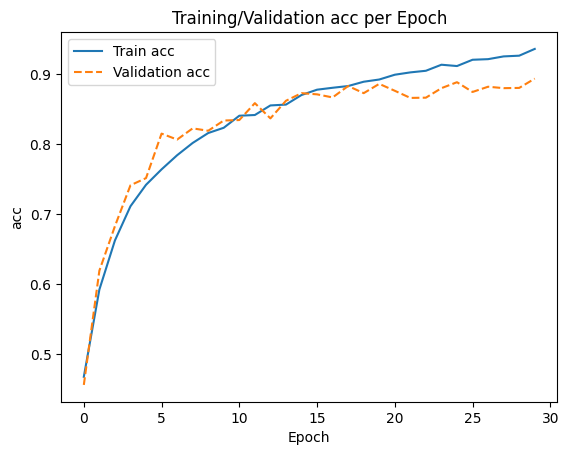

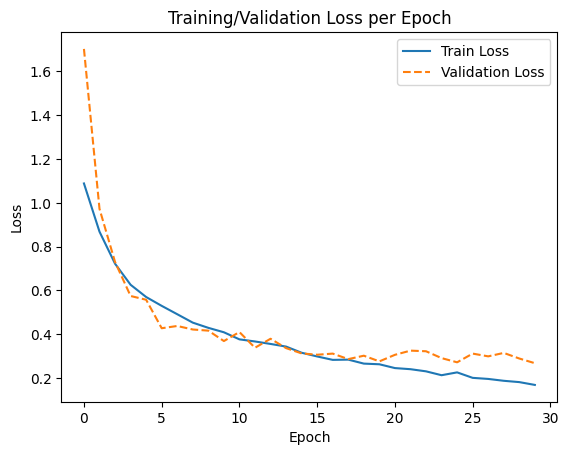

In [ ]:
print(hist_scratch.history.keys())

import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot(hist_scratch.history['accuracy'])
ax.plot(hist_scratch.history['val_accuracy'], '--')
ax.legend(['Train acc', 'Validation acc'])
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot(hist_scratch.history['loss'], )
ax.plot(hist_scratch.history['val_loss'], '--')
ax.legend(['Train Loss', 'Validation Loss'])
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

In [11]:
# vgg16model.load_weights("./cropModel.h5")
class_labels = test_generator.class_indices
oriningal_test_classes = test_generator.labels
print(class_labels)
print("Original test classes")
print(oriningal_test_classes)

Y_pred =vgg16model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print("Predicted test classes")
print(y_pred)

{'0': 0, '1': 1, '2': 2, '3': 3}
Original test classes
[0 0 0 ... 3 3 3]
Predicted test classes
[0 0 0 ... 3 3 3]


In [12]:
print('Accuracy {}'.format(accuracy_score(y_true=test_generator.labels, y_pred=y_pred)))
print('F1 {}'.format(f1_score(y_true=test_generator.labels, y_pred=y_pred,average = "macro")))
print('precision {}'.format(precision_score(y_true=test_generator.labels, y_pred=y_pred,average = "macro")))
print('recall {}'.format(recall_score(y_true=test_generator.labels, y_pred=y_pred,average = "macro")))

print('jaccard {}'.format(jaccard_score(y_true=test_generator.labels, y_pred=y_pred,average = "macro")))
print('classification_report\n {}'.format(classification_report(y_true=test_generator.labels, y_pred=y_pred)))
print('\n\n')
cm = confusion_matrix(y_true=test_generator.labels, y_pred=y_pred)
print(cm)

Accuracy 0.8987386124737211
F1 0.8979111316216342
precision 0.8998385028138529
recall 0.8984738537324745
jaccard 0.8223277874031294
classification_report
               precision    recall  f1-score   support

           0       0.84      0.91      0.88       754
           1       0.86      0.75      0.80       700
           2       0.90      0.93      0.91       700
           3       1.00      1.00      1.00       700

    accuracy                           0.90      2854
   macro avg       0.90      0.90      0.90      2854
weighted avg       0.90      0.90      0.90      2854




[[688  53  12   1]
 [112 528  60   0]
 [ 17  34 649   0]
 [  0   0   0 700]]
